In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from mpl_finance import candlestick_ohlc

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

In [72]:
name = '^NSEI'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2021-01-01",end="2021-08-01")
df['Date'] = range(df.shape[0])
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [73]:
def plot_chart(df):
    fig, ax = plt.subplots()
    candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
    fig.tight_layout()
    fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


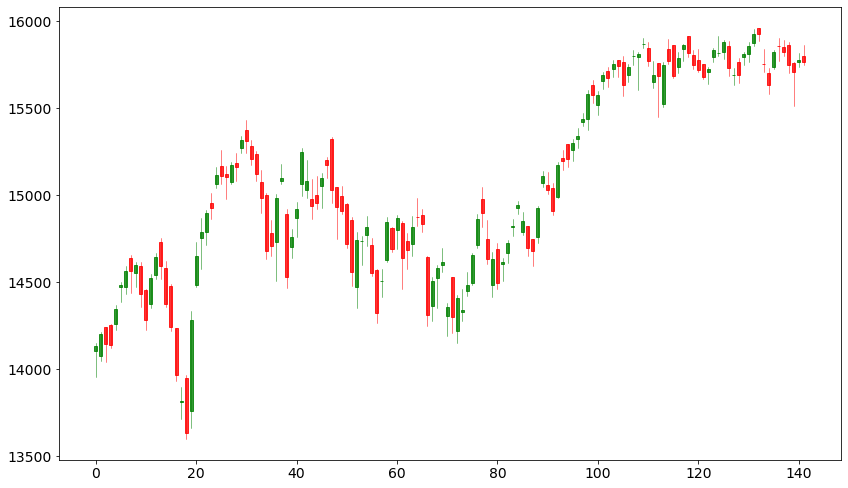

In [74]:
plot_chart(df)

## Heikin Ashi Calculation

(Refer [Investopedia](https://www.investopedia.com/trading/heikin-ashi-better-candlestick/) for more details)

* Open: (Open (previous candle) + Close (previous candle))/2
* Close: (Open + Low + Close + High)/4
* High: the same of the actual candle
* Low: the same of the actual candle

In [75]:
df_ha = df.copy()
for i in range(df_ha.shape[0]):
  if i > 0:
    df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][i-1] + df['Close'][i-1])/2
  
  df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][i] + df['Close'][i] + df['Low'][i] +  df['High'][i])/4
df_ha = df_ha.iloc[1:,:]

In [76]:
df_ha.head()

,Date,Open,High,Low,Close
Date,,,,,
2021-01-05,1,14118.625000,14215.599609,14048.150391,14134.600098
2021-01-06,2,14137.325195,14244.150391,14039.900391,14167.812744
2021-01-07,3,14193.600098,14256.250000,14123.099609,14192.612305
2021-01-08,4,14195.549805,14367.299805,14221.650391,14298.650146
2021-01-11,5,14302.825195,14498.200195,14383.099609,14460.024902


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


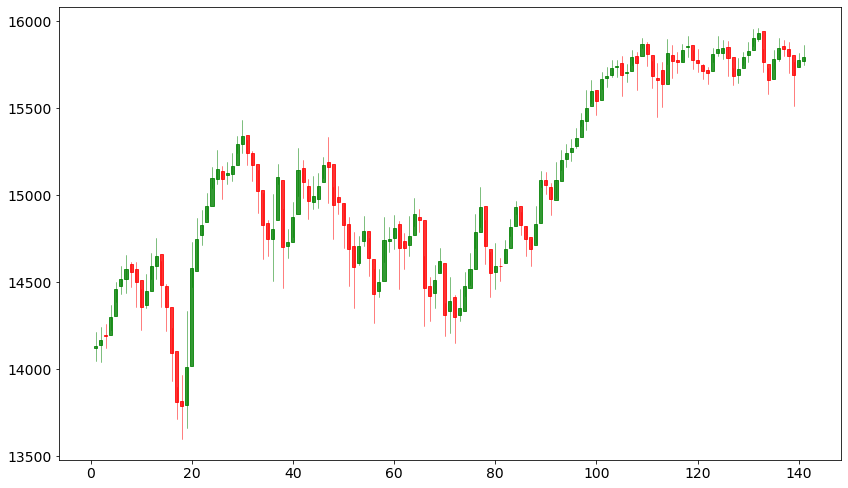

In [77]:
plot_chart(df_ha)